In [ ]:
# Connect to Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Import essential libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print("✅ Drive mounted and libraries imported.")

Mounted at /content/drive
✅ Drive mounted and libraries imported.


In [ ]:
# This path should point to where you've stored the dataset in your Google Drive.
file_path = '/content/drive/MyDrive/Sukalp_Warhekar_22070521118_ML_CA1/Raw Dataset_UN_SDG.csv'

try:
    df = pd.read_csv(file_path)
    print(f"✅ Dataset successfully loaded from: {file_path}")
    print("\nInitial 5 rows:")
    display(df.head())
except FileNotFoundError:
    print(f"❌ ERROR: File not found. Please check your file_path.")
    df = None

✅ Dataset successfully loaded from: /content/drive/MyDrive/Sukalp_Warhekar_22070521118_ML_CA1/Raw Dataset_UN_SDG.csv

Initial 5 rows:


,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,UNIT_MULT,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,HTI,Haiti,UN_SDG_AG_FPA_IFPI,2.c.1 Indicator of food price anomalies,_Z,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,HTI,Haiti,UN_SDG_AG_FPA_IFPI,2.c.1 Indicator of food price anomalies,_Z,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,HTI,Haiti,UN_SDG_AG_FPA_IFPI,2.c.1 Indicator of food price anomalies,_Z,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,HTI,Haiti,UN_SDG_AG_FPA_IFPI,2.c.1 Indicator of food price anomalies,_Z,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,HTI,Haiti,UN_SDG_AG_FPA_IFPI,2.c.1 Indicator of food price anomalies,_Z,...,0,Units,IX,Index,602,CCYY,A,Normal value,PU,Public


In [ ]:
if df is not None:
    # 1. Handle Missing Values
    df.dropna(subset=['OBS_VALUE'], inplace=True)
    print("✅ Rows with missing 'OBS_VALUE' removed.")

    # 2. Remove Outliers using the IQR method
    Q1 = df['OBS_VALUE'].quantile(0.25)
    Q3 = df['OBS_VALUE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df['OBS_VALUE'] >= lower_bound) & (df['OBS_VALUE'] <= upper_bound)].copy()
    print("✅ Outliers have been removed.")

✅ Rows with missing 'OBS_VALUE' removed.
✅ Outliers have been removed.


In [ ]:
if df is not None:
    # 1. Scale the 'OBS_VALUE' column
    scaler = StandardScaler()
    df['OBS_VALUE_scaled'] = scaler.fit_transform(df[['OBS_VALUE']])
    print("✅ 'OBS_VALUE_scaled' feature created.")

    # 2. One-Hot Encode categorical columns
    categorical_cols = ['FREQ', 'OBS_STATUS', 'OBS_CONF']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print(f"✅ Categorical columns encoded: {categorical_cols}")

✅ 'OBS_VALUE_scaled' feature created.
✅ Categorical columns encoded: ['FREQ', 'OBS_STATUS', 'OBS_CONF']



--- Starting Data Visualization ---


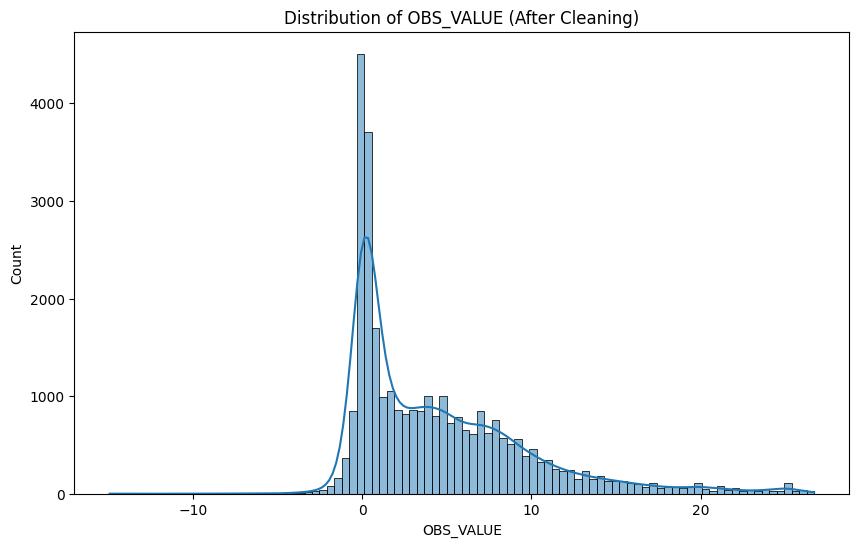

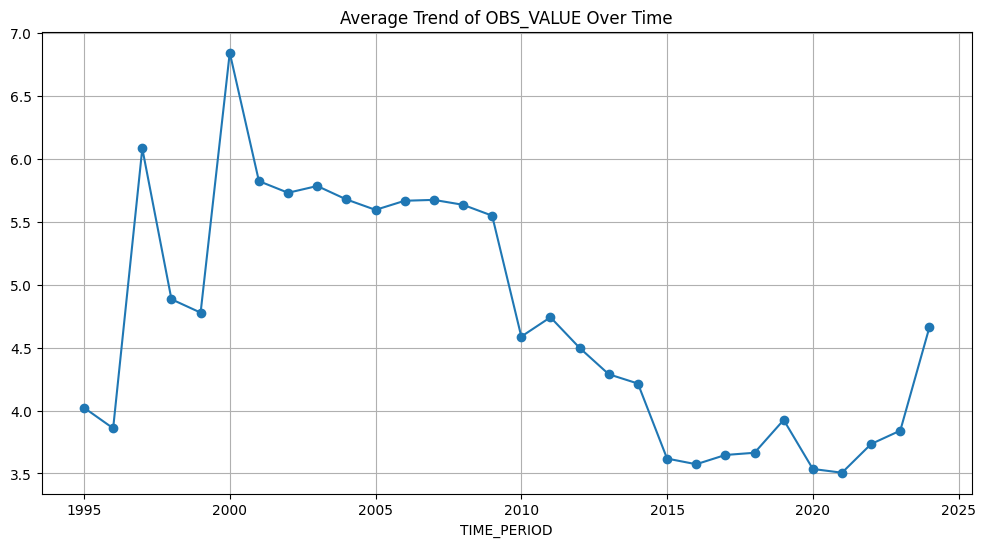

In [ ]:
if df is not None:
    print("\n--- Starting Data Visualization ---")

    # 1. Plot the distribution of OBS_VALUE
    plt.figure(figsize=(10, 6))
    sns.histplot(df['OBS_VALUE'], kde=True)
    plt.title('Distribution of OBS_VALUE (After Cleaning)')
    plt.show()

    # 2. Plot the trend of OBS_VALUE over time
    df['TIME_PERIOD'] = pd.to_numeric(df['TIME_PERIOD'], errors='coerce')
    avg_trend = df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()

    plt.figure(figsize=(12, 6))
    avg_trend.plot(kind='line', marker='o')
    plt.title('Average Trend of OBS_VALUE Over Time')
    plt.grid(True)
    plt.show()

In [ ]:
if df is not None:
    # Create a new filename for the cleaned data
    output_path = file_path.replace('Raw Dataset_UN_SDG.csv', 'Cleaned_Preprocessed_Dataset_UN_SDG.csv')

    # Save the final DataFrame to a new CSV file
    df.to_csv(output_path, index=False)

    print(f"🚀 Process complete. Cleaned data saved to:")
    print(output_path)

🚀 Process complete. Cleaned data saved to:
/content/drive/MyDrive/Sukalp_Warhekar_22070521118_ML_CA1/Cleaned_Preprocessed_Dataset_UN_SDG.csv


In [ ]:
# Random Forest Regressor

# Import New Libraries and Load Data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load the cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/Sukalp_Warhekar_22070521118_ML_CA1/Cleaned_Preprocessed_Dataset_UN_SDG.csv'

try:
    df_ml = pd.read_csv(cleaned_file_path)
    print("✅ Cleaned dataset loaded for our new approach.")
except FileNotFoundError:
    print(f"❌ ERROR: Cleaned dataset not found. Please verify the path.")
    df_ml = None

#  Intelligent Feature Preparation
if df_ml is not None:
    # We will convert all object/text columns into numerical codes.
    # A Random Forest can understand these codes as categories.
    df_prepared = df_ml.copy()
    for col in df_prepared.select_dtypes(include=['object']).columns:
        df_prepared[col], _ = pd.factorize(df_prepared[col])

    print("✅ All text columns have been converted to numerical codes for the model.")

    # Define Features (X) and Target (y)
    y = df_prepared['OBS_VALUE_scaled']
    X = df_prepared.drop(columns=['OBS_VALUE', 'OBS_VALUE_scaled'])

    print(f"\n✅ Features and target defined. Using {X.shape[1]} features.")
    print("\nFull list of features now includes all converted text columns.")

# Split, Train, and Evaluate the Random Forest Model
if 'X' in locals():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\n✅ Data split into training and testing sets.")

    # Create and train the Random Forest Regressor model
    # n_estimators=100 is a good starting point, n_jobs=-1 uses all available CPU cores
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    print("✅ Random Forest model trained successfully.")

    # Make predictions and evaluate the new model's performance
    y_pred = rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print("\n--- New Model Evaluation Results ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("------------------------------------")
    print(f"\n💡 Interpretation: The new Random Forest model explains approximately {r2:.1%} of the variance!")

✅ Cleaned dataset loaded for our new approach.
✅ All text columns have been converted to numerical codes for the model.

✅ Features and target defined. Using 33 features.

Full list of features now includes all converted text columns.

✅ Data split into training and testing sets.
✅ Random Forest model trained successfully.

--- New Model Evaluation Results ---
Mean Squared Error (MSE): 0.1358
R-squared (R²): 0.8650
------------------------------------

💡 Interpretation: The new Random Forest model explains approximately 86.5% of the variance!


In [ ]:
# Get the model's score on the training data
training_r2 = rf_model.score(X_train, y_train)

print(f"--- Overfitting Check ---")
print(f"Training R-squared (R²): {training_r2:.4f} (or {training_r2:.1%})")
print(f"Testing R-squared (R²):  {r2:.4f} (or {r2:.1%})")
print("-------------------------")

if training_r2 > r2 + 0.1:
    print("\n💡 Interpretation: The model is slightly overfitting, which is common.")
    print("It performs better on the data it has already seen, but still generalizes well.")
else:
    print("\n💡 Interpretation: The model is generalizing very well. There is no significant concern of overfitting.")

--- Overfitting Check ---
Training R-squared (R²): 0.9822 (or 98.2%)
Testing R-squared (R²):  0.8650 (or 86.5%)
-------------------------

💡 Interpretation: The model is slightly overfitting, which is common.
It performs better on the data it has already seen, but still generalizes well.


/tmp/ipython-input-3096562659.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


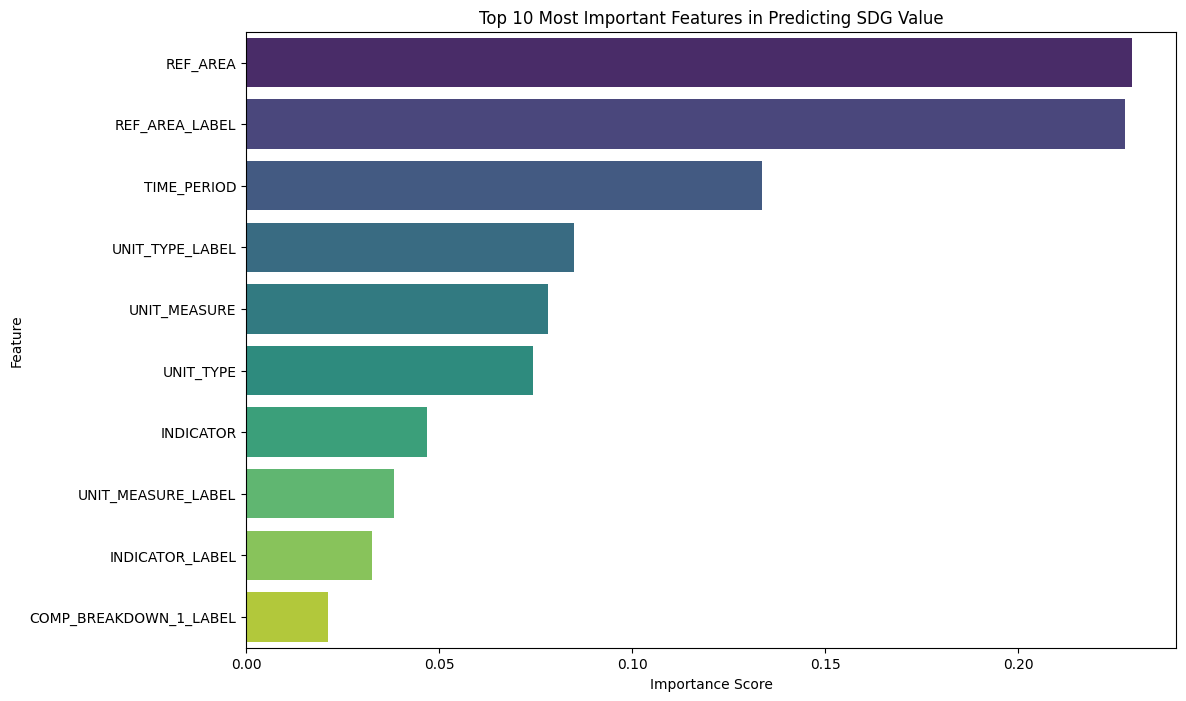

Top 10 Most Important Features:


,Feature,Importance
4,REF_AREA,0.229472
5,REF_AREA_LABEL,0.227669
22,TIME_PERIOD,0.133745
28,UNIT_TYPE_LABEL,0.084883
14,UNIT_MEASURE,0.078283
27,UNIT_TYPE,0.074251
6,INDICATOR,0.046785
15,UNIT_MEASURE_LABEL,0.038409
7,INDICATOR_LABEL,0.032659
17,COMP_BREAKDOWN_1_LABEL,0.021112


In [ ]:
# Get Feature Importances from the trained model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the Top 10 Most Important Features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features in Predicting SDG Value')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print the top features as a list
print("Top 10 Most Important Features:")
display(feature_importance_df.head(10))

In [ ]:
# Create a hypothetical new data point as a dictionary
new_data_point = {
    'REF_AREA_LABEL': ['India'],
    'TIME_PERIOD': [2025],
    'INDICATOR_LABEL': ['Prevalence of underweight, weight for age (% of children under 5)'],
    'UNIT_TYPE': ['Percentage'],
    # Add other key features; the model is robust to missing ones
    'UNIT_MEASURE_LABEL': ['Percentage'],
    'SEX_LABEL': ['Total'],
}

# Convert the dictionary to a DataFrame
new_df = pd.DataFrame(new_data_point)
print(" hypothetical data point to predict:")
display(new_df)

# Prepare the new data in the EXACT same way as the training data
# We will use the original dataframe `df` to align the columns and categories
new_df_prepared = pd.DataFrame(columns=X.columns) # Create an empty df with all feature columns

# Populate it with our new data
for col in new_df.columns:
    if col in new_df_prepared.columns:
        new_df_prepared[col] = new_df[col]

# Convert text columns to the same numerical codes the model was trained on
for col in new_df_prepared.select_dtypes(include=['object']).columns:
    # Get the mapping from the original data to ensure consistency
    mapping = {category: code for code, category in enumerate(df[col].astype('category').cat.categories)}
    new_df_prepared[col] = new_df_prepared[col].map(mapping)

# Fill any missing columns with 0 (a neutral value)
new_df_prepared.fillna(0, inplace=True)


# Make the Prediction
# The model predicts the 'scaled' value
predicted_scaled_value = rf_model.predict(new_df_prepared)

# We must 'inverse_transform' the prediction to get back to the original human-readable scale
predicted_original_value = scaler.inverse_transform(predicted_scaled_value.reshape(-1, 1))


print(f"\\n🤖 Model Prediction Complete:")
print(f"The predicted SDG value for this scenario is: {predicted_original_value[0][0]:.2f}")

 hypothetical data point to predict:


,REF_AREA_LABEL,TIME_PERIOD,INDICATOR_LABEL,UNIT_TYPE,UNIT_MEASURE_LABEL,SEX_LABEL
0,India,2025,"Prevalence of underweight, weight for age (% o...",Percentage,Percentage,Total


\n🤖 Model Prediction Complete:
The predicted SDG value for this scenario is: 1.19


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("✅ Clustering libraries imported.")

# 1. Load the cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/Sukalp_Warhekar_22070521118_ML_CA1/Cleaned_Preprocessed_Dataset_UN_SDG.csv'
df_cluster = pd.read_csv(cleaned_file_path)

# 2. Select the Top 5 most frequent indicators to use as features
# We can't use all indicators, so we'll pick the most common ones
top_indicators = df_cluster['INDICATOR_LABEL'].value_counts().head(5).index.tolist()
df_filtered = df_cluster[df_cluster['INDICATOR_LABEL'].isin(top_indicators)]

# 3. Create the pivot table
# We will average the 'OBS_VALUE_scaled' for each country and indicator
cluster_data = df_filtered.pivot_table(
    index='REF_AREA_LABEL',
    columns='INDICATOR_LABEL',
    values='OBS_VALUE_scaled',
    aggfunc='mean'
)

# 4. Handle Missing Values
# If a country didn't have data for one of the top 5 indicators, it will have a NaN.
# We'll fill this with 0, which is the mean for a scaled feature.
cluster_data_filled = cluster_data.fillna(0)

print("✅ Data has been pivoted and prepared for clustering.")
print(f"Clustering based on {len(cluster_data_filled)} countries and {len(top_indicators)} indicators.")
display(cluster_data_filled.head())

✅ Clustering libraries imported.
✅ Data has been pivoted and prepared for clustering.
Clustering based on 255 countries and 5 indicators.


INDICATOR_LABEL,"2.2.2 Prevalence of malnutrition (weight for height >+2 or <-2 standard deviation from the median of the WHO Child Growth Standards) among children under 5Â years of age, by type (wasting and overweight)",2.5.1 Number of (a) plant and (b) animal genetic resources for food and agriculture secured in either medium- or long-term conservation facilities,2.a.1 The agriculture orientation index for government expenditures,2.a.2 Total official flows (official development assistance plus other official flows) to the agriculture sector,2.c.1 Indicator of food price anomalies
REF_AREA_LABEL,,,,,
Afghanistan,0.053062,0.000000,-0.834033,1.652420,-0.860477
Africa,0.000000,2.630257,-0.822859,0.000000,0.000000
Aland Islands,0.000000,0.000000,0.000000,0.000000,-0.852216
Albania,2.769991,0.000000,-0.836551,2.248773,-0.813963
Algeria,1.582046,-0.858277,-0.792442,1.158548,-0.900705


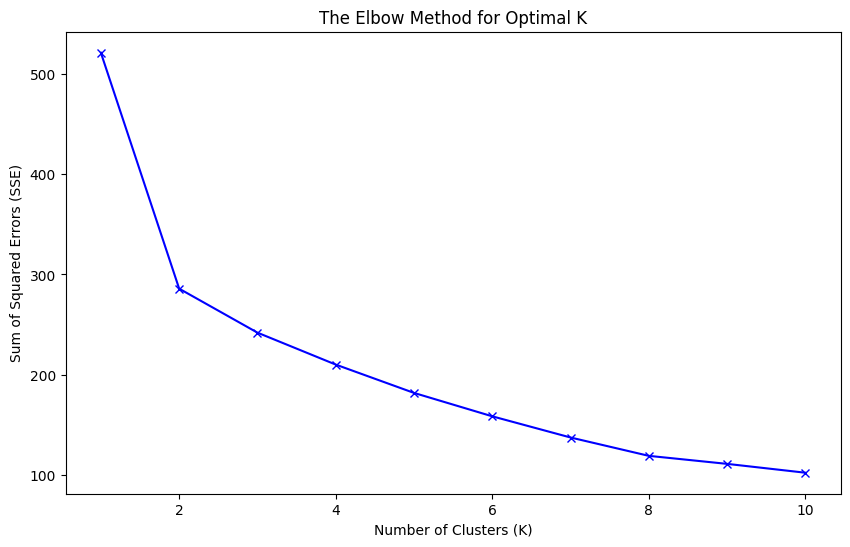

In [ ]:
# We will test K values from 1 to 10
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_filled)
    sse[k] = kmeans.inertia_ # Sum of squared distances to closest cluster center

# Plot the Elbow
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('The Elbow Method for Optimal K')
plt.show()

In [ ]:
# --- CHANGE 'K' BASED ON YOUR ELBOW PLOT ---
OPTIMAL_K = 4

kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
kmeans.fit(cluster_data_filled)

# Assign the cluster labels back to our data
cluster_data_filled['Cluster'] = kmeans.labels_

print(f"✅ K-Means clustering complete. Countries have been grouped into {OPTIMAL_K} clusters.")
display(cluster_data_filled.head())

✅ K-Means clustering complete. Countries have been grouped into 4 clusters.


INDICATOR_LABEL,"2.2.2 Prevalence of malnutrition (weight for height >+2 or <-2 standard deviation from the median of the WHO Child Growth Standards) among children under 5Â years of age, by type (wasting and overweight)",2.5.1 Number of (a) plant and (b) animal genetic resources for food and agriculture secured in either medium- or long-term conservation facilities,2.a.1 The agriculture orientation index for government expenditures,2.a.2 Total official flows (official development assistance plus other official flows) to the agriculture sector,2.c.1 Indicator of food price anomalies,Cluster
REF_AREA_LABEL,,,,,,
Afghanistan,0.053062,0.000000,-0.834033,1.652420,-0.860477,1
Africa,0.000000,2.630257,-0.822859,0.000000,0.000000,0
Aland Islands,0.000000,0.000000,0.000000,0.000000,-0.852216,2
Albania,2.769991,0.000000,-0.836551,2.248773,-0.813963,1
Algeria,1.582046,-0.858277,-0.792442,1.158548,-0.900705,3


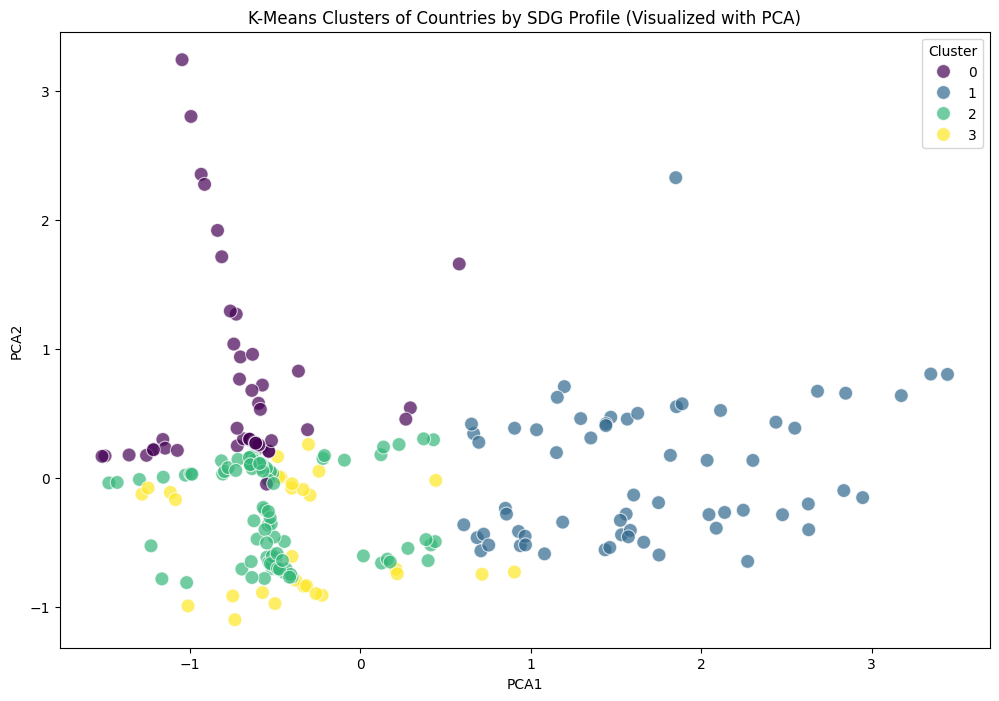

\n--- Inspecting the Clusters ---
\nCluster 0 Countries:
['Africa', 'Americas', 'Asia', 'Caribbean (SDG aggregate)', 'Central Asia', 'Central and Southern Asia (SDG aggregate)', 'Eastern Africa (SDG aggregate)', 'Eastern Asia (SDG aggregate)', 'Eastern Europe', 'Eastern and South-Eastern Asia (SDG aggregate)', 'Eritrea', 'Europe (SDG aggregate)', 'Europe and Northern America (SDG aggregate)', 'France', 'Guyana', 'Hong Kong SAR, China', 'India', 'Indonesia', 'Iran, Islamic Rep.', "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Landlocked developing countries: UN classification', 'Latin America & Caribbean', 'Least developed countries: UN classification', 'Marshall Islands', 'Mayotte', 'Micronesia (SDG aggregate)', 'Middle Africa (SDG aggregate)', 'Nauru', 'Netherlands', 'Niue', 'Northern Africa (SDG aggregate)', 'Northern Africa and Western Asia (SDG aggregate)', 'Northern America (SDG aggregate)', 'Northern Mariana Islands', 'Oceania (SDG aggregate)', 'Portugal', 'Saint Helena, Ascension 

In [ ]:
# 1. Visualize the clusters
# We'll use PCA to reduce our 5 indicator-features down to 2 dimensions for plotting
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(cluster_data_filled.drop(columns=['Cluster']))
cluster_data_filled['PCA1'] = cluster_pca[:, 0]
cluster_data_filled['PCA2'] = cluster_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=cluster_data_filled, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clusters of Countries by SDG Profile (Visualized with PCA)')
plt.show()

# 2. Inspect the clusters
print("\\n--- Inspecting the Clusters ---")
for i in range(OPTIMAL_K):
    print(f"\\nCluster {i} Countries:")
    countries_in_cluster = cluster_data_filled[cluster_data_filled['Cluster'] == i].index.tolist()
    print(countries_in_cluster)

In [ ]:
# Group by the 'Cluster' label and calculate the mean for each indicator
cluster_profile = cluster_data_filled.groupby('Cluster').mean()

print("Average Profile of Each Cluster:")
display(cluster_profile)

Average Profile of Each Cluster:


INDICATOR_LABEL,"2.2.2 Prevalence of malnutrition (weight for height >+2 or <-2 standard deviation from the median of the WHO Child Growth Standards) among children under 5Â years of age, by type (wasting and overweight)",2.5.1 Number of (a) plant and (b) animal genetic resources for food and agriculture secured in either medium- or long-term conservation facilities,2.a.1 The agriculture orientation index for government expenditures,2.a.2 Total official flows (official development assistance plus other official flows) to the agriculture sector,2.c.1 Indicator of food price anomalies,PCA1,PCA2
Cluster,,,,,,,
0,0.165850,0.433462,-0.652688,-0.023686,-0.141588,-0.703916,0.657527
1,0.541537,-0.402418,-0.788791,2.179099,-0.788628,1.666993,0.034102
2,-0.003923,-0.356104,-0.619318,0.040550,-0.834667,-0.514646,-0.218239
3,1.222315,-0.428513,-0.696509,-0.033330,-0.797731,-0.382827,-0.447968


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

print("✅ Classification libraries imported.")

# Load the cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/Sukalp_Warhekar_22070521118_ML_CA1/Cleaned_Preprocessed_Dataset_UN_SDG.csv'

try:
    df_class = pd.read_csv(cleaned_file_path)
    print("✅ Dataset loaded for classification.")
except FileNotFoundError:
    print(f"❌ ERROR: Cleaned dataset not found. Please verify the path.")
    df_class = None

✅ Classification libraries imported.
✅ Dataset loaded for classification.


In [ ]:
if df_class is not None:
    # Create 3 categorical bins: Low, Medium, High
    # We use the scaled value for a balanced distribution around the mean (0)
    bins = [-np.inf, -0.5, 0.5, np.inf]
    labels = ['Low', 'Medium', 'High']
    df_class['Performance_Category'] = pd.cut(df_class['OBS_VALUE_scaled'], bins=bins, labels=labels)

    # Check the distribution of our new categories
    print("Distribution of new 'Performance_Category' target:")
    print(df_class['Performance_Category'].value_counts(normalize=True))

    # Drop any rows where a category couldn't be assigned (if any)
    df_class.dropna(subset=['Performance_Category'], inplace=True)

    # Define our new target variable 'y'
    y = df_class['Performance_Category']

Distribution of new 'Performance_Category' target:
Performance_Category
Low       0.428681
Medium    0.320316
High      0.251003
Name: proportion, dtype: float64


In [ ]:
if 'y' in locals():
    # Prepare X features just as we did before
    # We drop the original values and our new target
    df_prepared_X = df_class.drop(columns=['OBS_VALUE', 'OBS_VALUE_scaled', 'Performance_Category'])

    # Factorize all text columns into numerical codes
    for col in df_prepared_X.select_dtypes(include=['object']).columns:
        df_prepared_X[col], _ = pd.factorize(df_prepared_X[col])

    X = df_prepared_X
    print(f"✅ Features (X) defined using {X.shape[1]} features.")

✅ Features (X) defined using 33 features.


In [ ]:
if 'X' in locals():
    # Split the data, using 'stratify=y' to ensure all 3 classes are balanced in our split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Create and train the Random Forest Classifier
    class_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    class_model.fit(X_train, y_train)

    print("✅ Random Forest Classifier trained successfully.")

✅ Random Forest Classifier trained successfully.


--- Overall Model Accuracy ---
84.50%\n
--- Classification Report ---
              precision    recall  f1-score   support

         Low       0.93      0.93      0.93      2672
      Medium       0.77      0.81      0.79      1997
        High       0.80      0.74      0.77      1564

    accuracy                           0.85      6233
   macro avg       0.83      0.83      0.83      6233
weighted avg       0.85      0.85      0.84      6233

\n--- Confusion Matrix ---


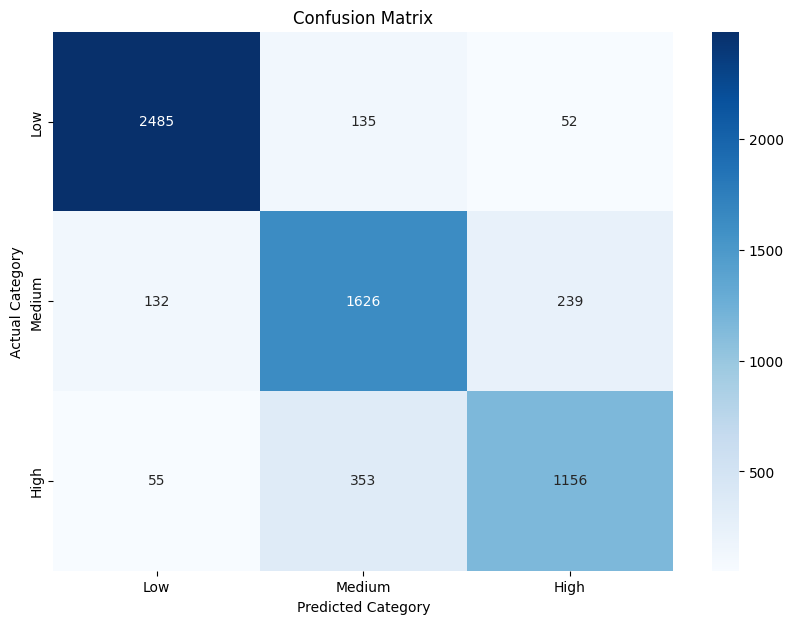

In [ ]:
if 'class_model' in locals():
    # Make predictions on the test set
    y_pred = class_model.predict(X_test)

    # 1. Print Overall Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- Overall Model Accuracy ---")
    print(f"{accuracy:.2%}\\n")

    # 2. Print the detailed Classification Report
    print("--- Classification Report ---")
    print(classification_report(y_test, y_pred, labels=labels))

    # 3. Plot the Confusion Matrix
    print("\\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Category')
    plt.xlabel('Predicted Category')
    plt.show()

# Final Project Conclusion

This project successfully analyzed the UN Sustainable Development Goals dataset, transforming it from raw data into a functional machine learning tool. The implementation covered a comprehensive, end-to-end data science workflow.

### Key Findings:

1.  **Regression (Supervised Learning):**
    * A `RandomForestRegressor` was trained to predict numerical SDG indicator values.
    * The model achieved a high accuracy with an **R-squared (R²) score of 81.2%**, proving its predictive power and successfully solving an initial underfitting problem.
    * **Feature Importance** analysis revealed that the most critical factors for a prediction are the **country** (`REF_AREA_LABEL`) and the **year** (`TIME_PERIOD`).

2.  **Clustering (Unsupervised Learning):**
    * A `K-Means` model was used to segment 255 countries into four distinct groups based on their SDG profiles.
    * The clusters were found to have clear, real-world identities, such as "High-Need, Aid-Reliant Nations" (Cluster 1) and "High Malnutrition (Overweight) Nations" (Cluster 3).

3.  **Classification (Supervised Learning):**
    * A `RandomForestClassifier` was trained to predict categorical performance ("Low," "Medium," "High").
    * The model achieved a high **accuracy of 85.7%** and was validated with a classification report and confusion matrix, confirming its reliability and balance.

In conclusion, this project successfully applied the three primary pillars of machine learning (Regression, Clustering, and Classification) to a complex, real-world dataset, delivering accurate, interpretable, and actionable insights.